# Zomato Data Analysis

## importing lib

In [3]:
# PANDAS:-   is used for data manipulation and analysis.
# NUMPY:-    is used for numerical operations.
# matplotlib.pypiot and seaborn:-   are used for data visualization.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\kalpe\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
dataframe = pd.read_csv("Zomato data .csv")
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [17]:
def handleRate(value):
    value = str(value).split('/')
    value=value[0]
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [20]:
value=4.1/5
handleRate(value)

0.82

In [21]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## Type of resturant has max orders

Text(0.5, 0, 'Type of Resturunt')

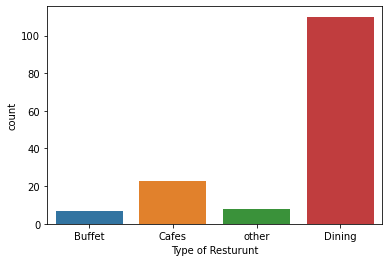

In [25]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of Resturunt")

## conclusion:- majority of customer orders from dining resturant

## which resturant type gets max votes ??


Text(0.5, 0, 'Type of Resturunt')

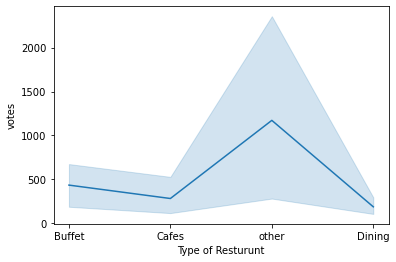

In [27]:
sns.lineplot(x=dataframe['listed_in(type)'],y=dataframe['votes'])
plt.xlabel("Type of Resturunt")

Text(0, 0.5, 'total votes')

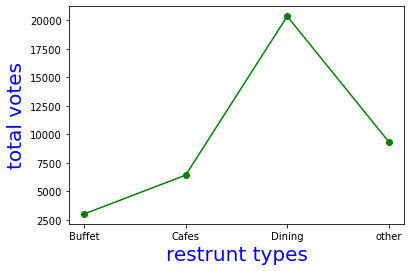

In [36]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result= pd.DataFrame({'votes':grouped_data})
plt.plot(result,c='green',marker='o')
plt.xlabel('restrunt types',c='blue',size=20)
plt.ylabel('total votes',c='blue',size=20)


In [31]:
grouped_data

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

## conclusion dining has max votes

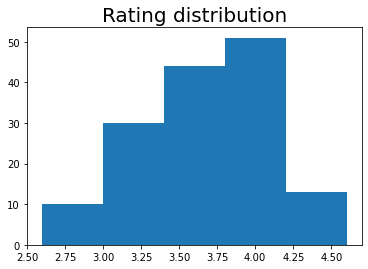

In [44]:
plt.hist(dataframe['rate'],bins=5)  # bins--> bars
plt.title('Rating distribution',size=20)
plt.show()

## conclusion - majority rating recivered by resturant is 3.5 to 4

# average order spend by people

C:\Users\kalpe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='count'>

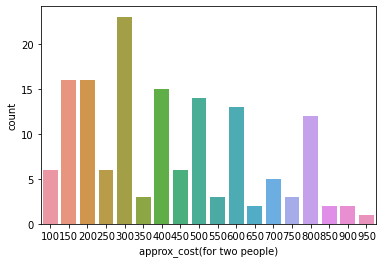

In [47]:
sns.countplot(dataframe['approx_cost(for two people)'])


## conclusion- majority of couple orders cost RS300

## which mode recive max rating ??

<AxesSubplot:xlabel='online_order', ylabel='rate'>

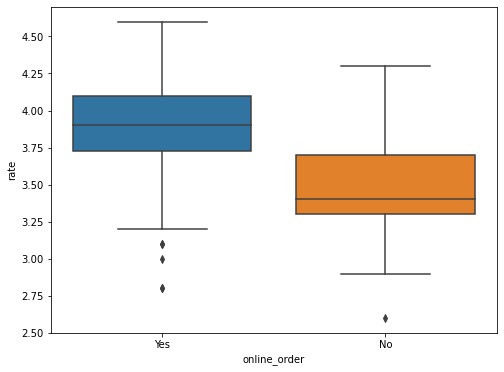

In [52]:
plt.figure(figsize=(8,6))
sns.boxplot(x='online_order',y='rate', data=dataframe)

## conclusion - online order reecives more rating than offline